# Oppgave: Gjennkjenning av håndskrevne tall
Vi har et bildesett av ca 60000 håndskrevne tall. Vi vil bruke disse til å kjenne igjen andre andre håndskrevne tall.
Alle bildene er 28x28 piksler.

## Litt om bilder på datamaskin
Bildene i denne oppgaven representeres som en tabell av heltall mellom 0 og 255, der 0 er hvit og 255 er svart. Verdiene 1-254 er forskjellige gråtoner.

Hver av de 28x28 (784) pikslene skal vi bruke som forklaringsvariable.

In [9]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


from sklearn import tree
#from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import itertools

from scipy.ndimage import imread
# from matplotlib.image import imread

# Add parent directory to path
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])

from useful_tools import ModelTester

seaborn.set_style("whitegrid", {'axes.grid' : False})

## Laste inn data
Laste inn og dele opp data i features (pikslene i bildet) og labels (tallet det er bilde av)

In [3]:
data = pd.read_csv("../../datasets/mnist/mnist_train.csv", header=-1)

data.columns = ['label'] + list(data.columns)[1:]

features = data.drop(['label'], axis=1)
labels = data[['label']]

For å sjekke at alt er i orden kan vi vise frem det første bildet, og printe pikselverdiene.

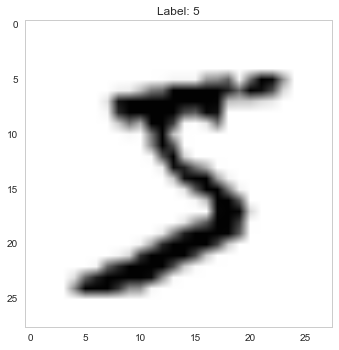

In [4]:
first_image = np.reshape(features.values[0],(28,28))
plt.imshow(first_image)
plt.title('Label: {}'.format(labels.values[0][0]))
plt.show()

In [5]:
print(first_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Dele i trening og testdata
Prediksjon med KNN tar lang tid hvis man har mye data. Dette skyldes at avstandene til punktene i treningssetrtet må regnes ut for alle nye punkter. Derfor velger vi å holde oss til de første 10000 bildene i datasettet. Treningssettet blir da på ca. 6666 punkter, og testsettet på 3333.

In [6]:
num_samples = 10000
train_data, test_data,train_target,  test_target = train_test_split(features[:num_samples], labels[:num_samples], test_size=0.33, random_state=42)
tester = ModelTester(test_data, test_target)



## Vi trener en K nærmeste nabo-klassifikator

In [7]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_data, train_target[['label']].values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Når vi snakker om avstanden mellom to bilder (bilde A og bilde B), regner vi ut avstanden ved å ta hver av pikslene i A bildet og trekke fra verdien i de korresponderende pikslene til B. Deretter opphøyer vi alle disse forskjellene i 2. På denne måten vil alle forskjellene bli positive. Deretter summerer vi dem, og tar kvadratroten.



## Hva ble nøyaktigheten?

Confusion matrix, without normalization


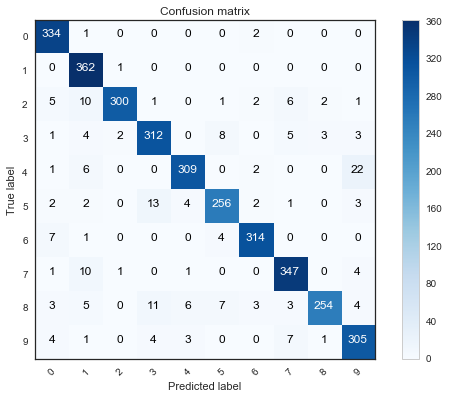

Accuracy:  93.7272727273 %


In [8]:
predictions = clf.predict(test_data)
accuracy, cnf_mat = tester.test_classifier(clf, list(map(str, range(10))))

Nøyaktigheten ble veldig bra, men det er selvsagt noen bilder som ble klassifisert feil. For å få en bedre innsikt i klassifikatoren, kan vi vise frem de bildene som ble feilklassifiserte. Vi ser på noen av dem.

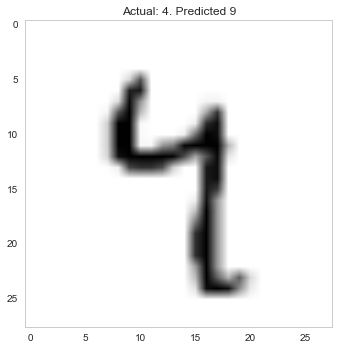

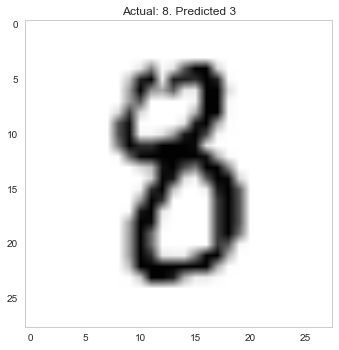

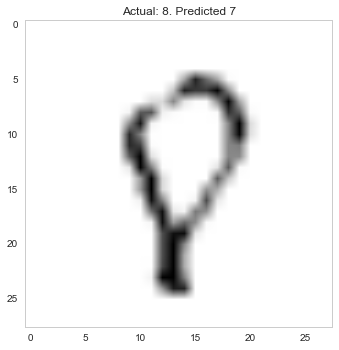

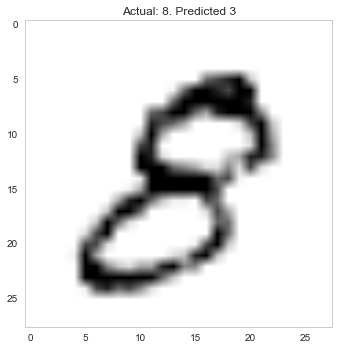

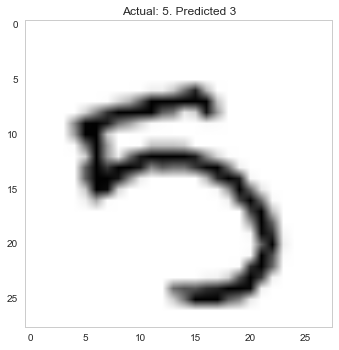

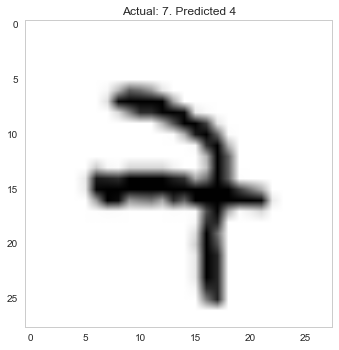

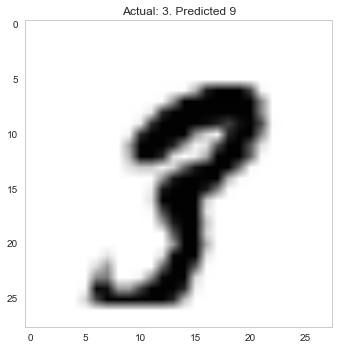

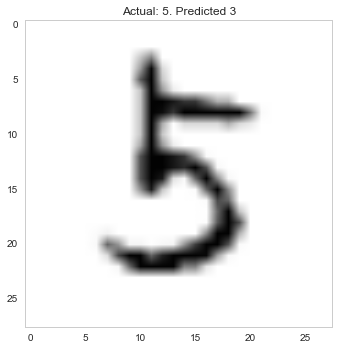

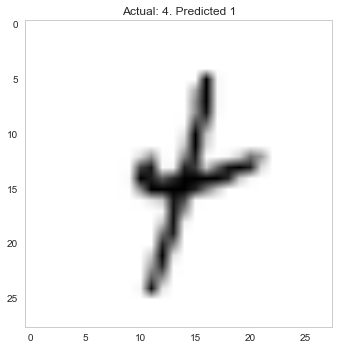

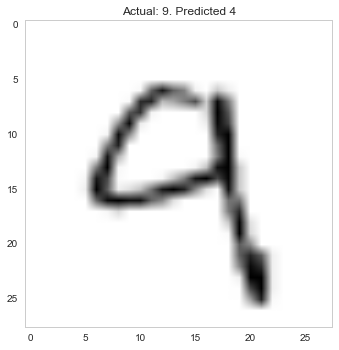

In [12]:
wrong_class = predictions!=test_target[['label']].values.ravel()
wrong_images = test_data[wrong_class]

for i, row in enumerate(itertools.islice(wrong_images.iterrows(), 10)):
    id_num, im_row = row
    im = im_row.values.reshape(28, 28)
    plt.imshow(im)
    plt.title('Actual: %d. Predicted %d' % (test_target.loc[id_num], predictions[wrong_class][i]))
    plt.show()    

**Oppgave 1:** Ta for deg noen av de feilklassifiserte bildene ovenfor, og forklar hvorfor du tror KNN har endt opp med det resultatet.

**Oppgave 2:** Alle bildene i MNIST-datasettet preprosessert slik at selve tallet er plassert inne i en 20x20 piksler stor boks i det 28x28 piksler store bildet. I tillegg er sifferet sentrert i bildet. Forklar hvorfor dette er lurt å gjøre. Særlig med tanke på klassifikasjon med KNN.

**Oppgave 3:** Lag noen egne bilder i f.eks. Microsoft Paint eller GIMP. Ta diskusjonen i forrige oppgave i betraktning når du tegner. Prøv ut forskjellige plasseringer og rotasjoner av sifrene, og kanskje også tykkelsen på streken. **OBS:  Husk at bildet må være 28x28**

Hvilke tall er enkle å klassfisere rett? Hvilke er vanskelige? Hvorfor?

For å lese inn bildene dine i denne oppgaven kan du bruke funksjonen `read_image`, som er definert nedenfor. Den tar inn filnavnet, leser bildet inn som gråtoner og returnerer en 1 x `antall piksler`-array der hvert element korresponderer til en piksel i bildet. Dette gjøres for at vi skal kunne sende bildet til `predict`-metoden i modellen. Dersom bildet ikke er 28x28 piksler, vil funksjonen printe en advarsel.

Dersom du vil vise bildet må du derfor bruke `reshape`-metoden. For eksempel kan du gjøre slik:
```python
im = read_image('../bilde.png')
plt.imshow(im.reshape(28, 28))
plt.show()
```

In [13]:
def read_image(filename):
    im = 255-imread(filename, flatten=True)
    if im.shape != (28, 28):
        print('Advarsel: {} er ikke 28 x 28 piksler!'.format(filename))
    return im.reshape(1, -1)

(1, 784)


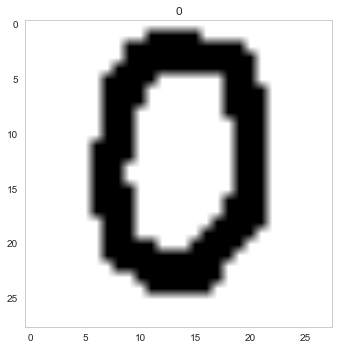

(1, 784)


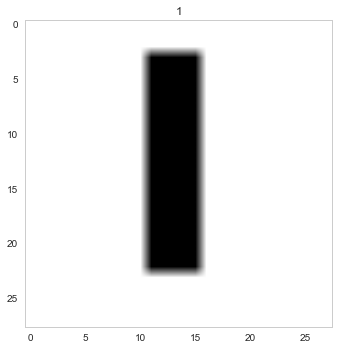

(1, 784)


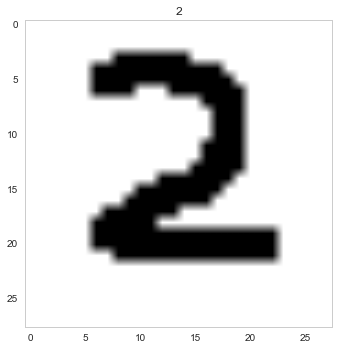

(1, 784)


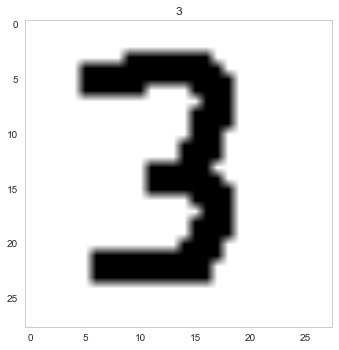

(1, 784)


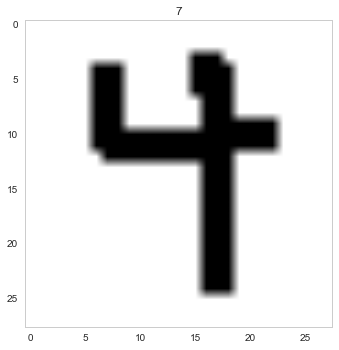

(1, 784)


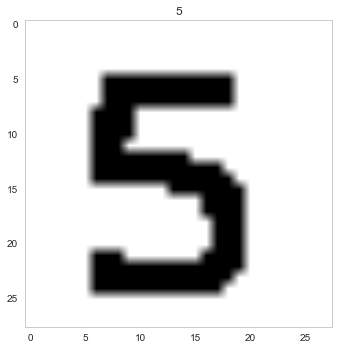

(1, 784)


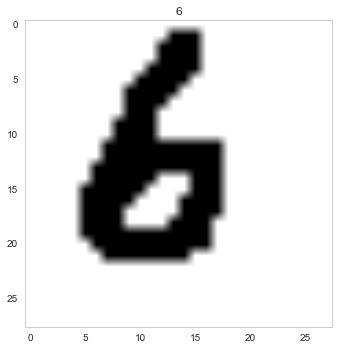

(1, 784)


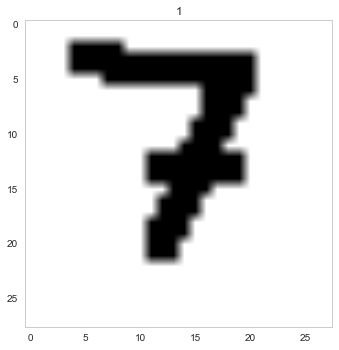

(1, 784)


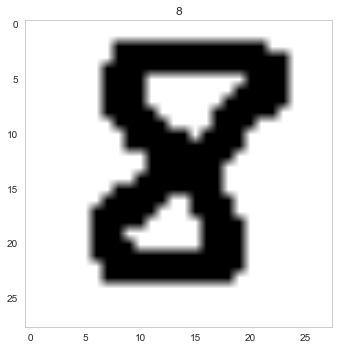

(1, 784)


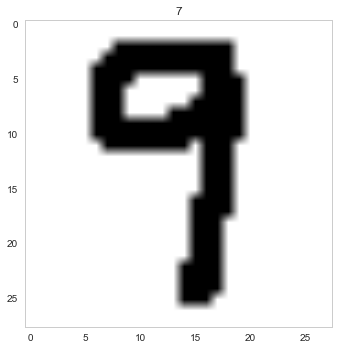

In [14]:

# "Løsning"/eksempel
for i in range(10):
    filename = '../../datasets/mnist/new/{}.png'.format(i)
    im = read_image(filename)
    print(im.shape)
    pred = clf.predict(im)
    plt.imshow(im.reshape(28, 28))
    plt.title('{}'.format(pred[0]))
    plt.show()